# SPA632M
# Assignment 2: Fourier Analysis

## Goals
Apply techniques learned in Fourier series and transform lectures to solve the following questions. 

| Problem | Content | Points |
| :--- | :--- | :---: |
| Problem 1 | How many fourier components are required to describe the function, <br/>$f(x) = 1/(\exp(x) + \exp(-x))$ within accurancy of 1%?  No fft; only numpy | 11 |            
| Problem 2 | For the data of the Sunspots for each year, compute the main period of the oscillations. Use fft. | 9 |
| Problem 3 | Apply Fourier transforms to given music data. De-noise the Sound Signal to best of your ability. <br/>What percentage of the (Fourier) data can be thrown away to recover top 5 frequecies? Use fft. | 10 | 
| Problem 4 | Apply Fourier transforms to a given image. <br/> Use thresholds = 1%, 5%, 10%, 50% applied to the frequency spectrum to filter the Fourier components. <br/> Analyse what it means for the reconstructed image as compared with the orginal image. | 15 |
| __Total__ | | __55__ | 

Use scipy only for computing FFTs in Problem 3 and 4.

Please send your solution per mail to Rohit and Ankan.

## Prerequisites

Install `librosa` and `scipy`. 

Then, import the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from IPython.display import Audio
import librosa
from librosa import display
from scipy.fft import fft, ifft, fftfreq, fft2,ifft2
import soundfile as sf

print("All necesary libraries available.")

All necesary libraries available.


## Problem 1: FOURIER COMPONENTS AND APPROXIMATION - 11 points

How many fourier components are required to approximate the function, <br>
$\qquad f(x) = 1/(\exp(x) + \exp(-x))$ for $-5<x<5$ within an error of $1\%$?

Proceed as follows:

(a) Write a function to compute a fourier component. Use trapezoidal rule for the integration (you can numpy). (4 points)

(b) Write a function to compute the fourier approximation using the fourier components. <br/>
    Plot the approximation and compare it with the function. (4 points)

(c) How many Fourier coefficients do you need for 0.1% error. <br/>
    $\qquad {\rm error} = \frac{1}{N}\sum_i (|f(x_i) - f_{\rm app}(x_i)|)/f(x_i)$ <br/>
    where 
 - N is the total number of grid points (also used for computing the integral in (a) and 
 - $f_{\rm app}$ the approximation obtained by the finite number of Fourier coefficients. (3 points)

### Solution to Problem 1

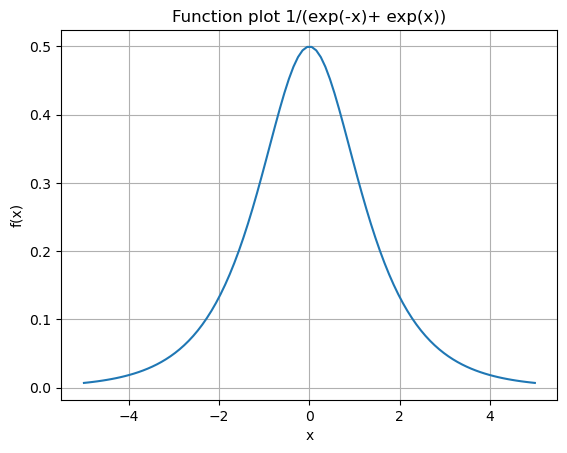

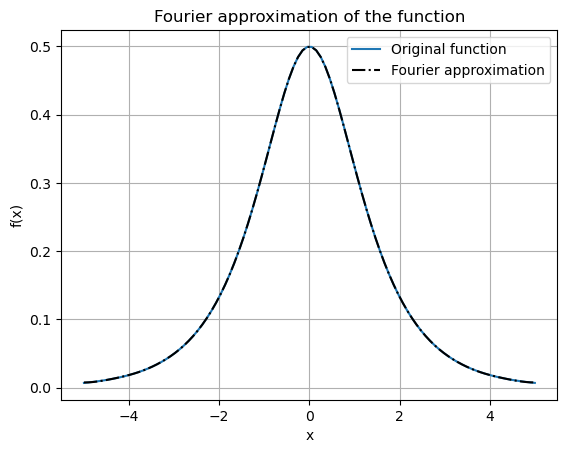

In [2]:
# Answer 1 a

def func(x):
    denominator = np.exp(-x)+ np.exp(x)
    return 1/denominator

x_start = -5
x_end = 5
x = np.linspace(x_start, x_end, 100)
y = func(x)
plt.plot(x, y)
plt.title("Function plot 1/(exp(-x)+ exp(x))")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# fourier component using Trapezoidal integration numpy
class ashwin_FC:

    def a_0(func,x,n,L):
        y = func(x)
        return 1 / (2*L) * np.trapz(y, x)
    
    def a_n(func,x,n,L):
        y = func(x)
        return 1 / (L) * np.trapz(y * np.cos(n * np.pi * x / L ), x)
    
    def b_n(func,x,n,L):
        y = func(x)
        return 1 / (L) * np.trapz(y * np.sin(n * np.pi * x / L), x)
    
    def approximation(func,x,N):
        L = round(x[-1] - x[0]) / 2
        a0 = ashwin_FC.a_0(func,x,0,L)
        approx = a0 
        for i in range(1, N):
            an = ashwin_FC.a_n(func,x,i,L)
            bn = ashwin_FC.b_n(func,x,i,L)
            approx = approx + an * np.cos(i * np.pi*x/L) + bn * np.sin(i * np.pi*x/L)
        return approx

# Fourier approximation
N = 100
M = 10
x_start = -5
x_end = 5
x = np.linspace(x_start, x_end, N)
approx = ashwin_FC.approximation(func,x ,M)


plt.plot(x, func(x), label='Original function')
plt.plot(x, approx, "k-.",label='Fourier approximation')
plt.title("Fourier approximation of the function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Error in Fourier approximation:  87.4703480463703
Error % in Fourier approximation with M =  2 is:  87.4703480463703
Error % in Fourier approximation with M =  3 is:  21.658793196854386
Error % in Fourier approximation with M =  4 is:  4.64889606700695
Error % in Fourier approximation with M =  5 is:  1.842965965392756
Error % in Fourier approximation with M =  6 is:  0.16596991094591945
Error % in Fourier approximation with M =  7 is:  0.3518015556435705
Error % in Fourier approximation with M =  8 is:  0.12657947971248024
Error % in Fourier approximation with M =  9 is:  0.1604920911503403
Error % in Fourier approximation with M =  10 is:  0.11938273287572473
Error % in Fourier approximation with M =  11 is:  0.111241806311114
Error % in Fourier approximation with M =  12 is:  0.09651508020052775
Minimum Fourier components to get error < 0.1% is: M =  12


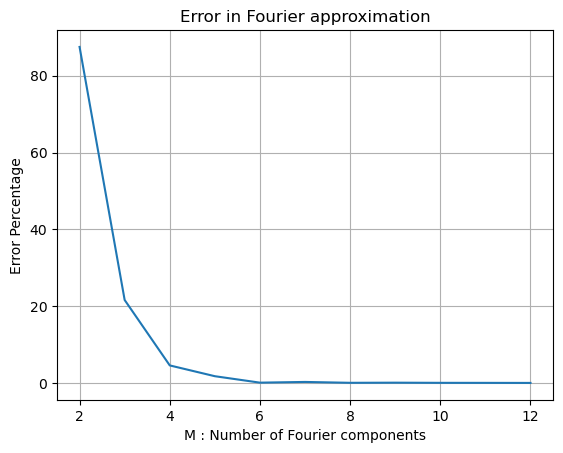

In [3]:
# 1 c :

#Error percentage
def error(original,aprox,):
    N = len(original)
    error = sum((original - aprox)/(original) )/ N
    return abs(error) * 100

# Error calculation
N = 100
M = 2
x_start = -5
x_end = 5
x = np.linspace(x_start, x_end, N)
approx = ashwin_FC.approximation(func,x ,M)
error_vi = error(func(x), approx)
print("Error in Fourier approximation: ", error_vi)


error_val = []
Ms = []
for i in range(2, 100):
    approx = ashwin_FC.approximation(func,x ,i)
    error_vi = error(func(x), approx)
    print("Error % in Fourier approximation with M = ", i, "is: ", error_vi)
    Ms.append(int(i))
    error_val.append(error_vi)
    if error_vi <= 0.1:
        print("Minimum Fourier components to get error < 0.1% is: M = ", i)
        break   

plt.plot(Ms, error_val)
plt.title("Error in Fourier approximation")
plt.xlabel("M : Number of Fourier components")
plt.ylabel("Error Percentage")
plt.grid()
plt.show()






## Problem 2: APPLICATION OF FOURIER ANALYSIS TO A DATASET - 9 points

Apply Fourier analysis to the sunspot data - here, use FFT routine (from `numpy` or `scipy`). 

(a) Power spectrum is the square of the amplitude of the fourier components. Plot it. Find the dominant period of oscillation by identifying it from the Fourier component with the largest amplitude. Note that this will give you an estimate for the length of the so called _solar cycle_. (4 points)

(b) Can you identify any other period in the sunspot data - by further analysing the Fouroer spectrum? (2 points)

(c) Compare the results obtained here by using the FFT from the result that you obtain by applying the function implemented in Problem 1. <br/>Do you observe differences in the fourier coefficients among them? What could be the reason for any differences? (3 points) 

### Solution to the Problem 2

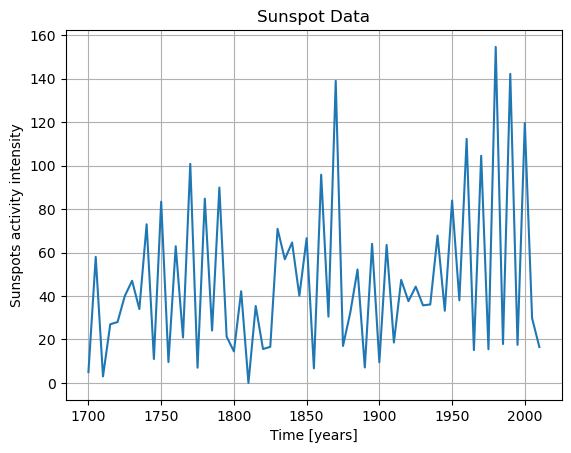

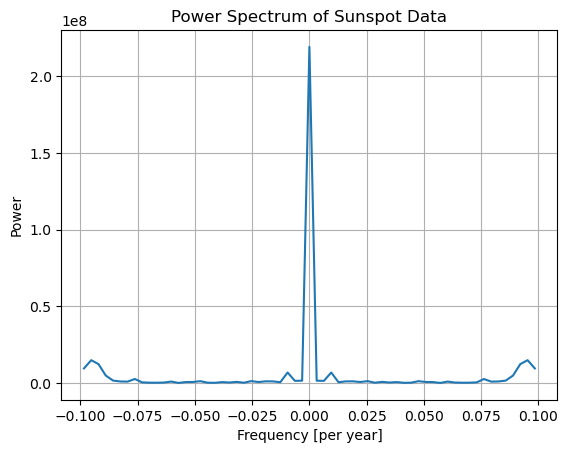

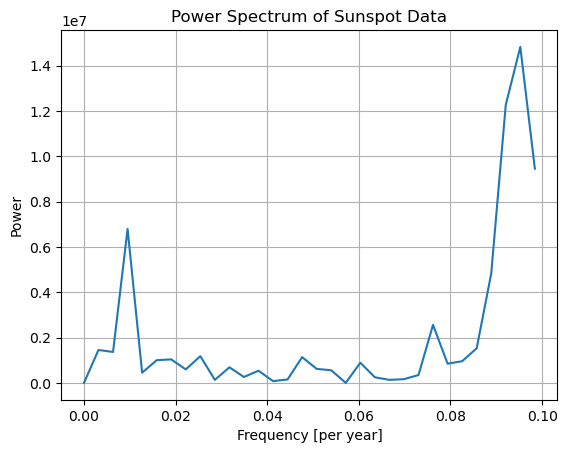

Dominant period that is solar cycle =  10.50 years


In [4]:
# Answer - 2a

def FT_numpy(x, y):
    N = len(x)
    dt = x[1] - x[0]  
    f = np.fft.fftfreq(N, dt)  
    f = np.fft.fftshift(f) 
    FT = np.fft.fft(y) * dt 
    FT = np.fft.fftshift(FT) 
    return f, FT

# Load sunspot data 
data = np.loadtxt('./assignment-2/sunspot_data.txt') 
time = data[:, 0]  # years or months
sunspots_data = data[:, 1]

plt.plot(time, sunspots_data)
plt.title('Sunspot Data')
plt.xlabel('Time [years]')  
plt.ylabel('Sunspots activity intensity')
plt.grid(True)
plt.show()
 
freq , Amplitude = FT_numpy(time, sunspots_data)

power = np.abs(Amplitude)**2

plt.plot(freq, power)
plt.title('Power Spectrum of Sunspot Data')
plt.xlabel('Frequency [per year]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

N = len(freq)
power_positive = power[N//2:]
freq_positive = freq[N//2:]
power_positive[0] = 0 # removing the 0 freq

plt.plot(freq_positive, power_positive)
plt.title('Power Spectrum of Sunspot Data')
plt.xlabel('Frequency [per year]')
plt.ylabel('Power')
plt.grid(True)
plt.show()



idx = np.argmax(power_positive) 
dominant_freq = freq_positive[idx]
dominant_period = 1 / dominant_freq
print(f"Dominant period that is solar cycle =  {dominant_period:.2f} years")


In [ ]:
def find_top_frequencies(freqs, power, n_peaks=5, min_sep=0.1):
    # 1) Find all local maxima (strictly greater than neighbors)
    greater_than_left  = power > np.roll(power,  1)
    greater_than_right = power > np.roll(power, -1)
    is_peak = greater_than_left & greater_than_right
    peak_idxs = np.where(is_peak)[0]

    # 2) Sort those peaks by descending power
    sorted_peaks = peak_idxs[np.argsort(power[peak_idxs])[::-1]]

    # 3) Greedily select peaks, skipping any within min_sep of an already chosen one
    selected = []
    for idx in sorted_peaks:
        f0 = freqs[idx]
        # check distance to all already selected peaks
        if all(abs(f0 - freqs[j]) > min_sep for j in selected):
            selected.append(idx)
            if len(selected) == n_peaks:
                break

    # Return the frequencies and powers of the selected peaks
    top_freqs = freqs[selected]
    top_power = power[selected]
    return top_freqs, top_power,selected


Other period: 21.00 years
Other period: 39.38 years
Other period: 13.12 years
Other period: 105.00 years
Other period: 10.50 years


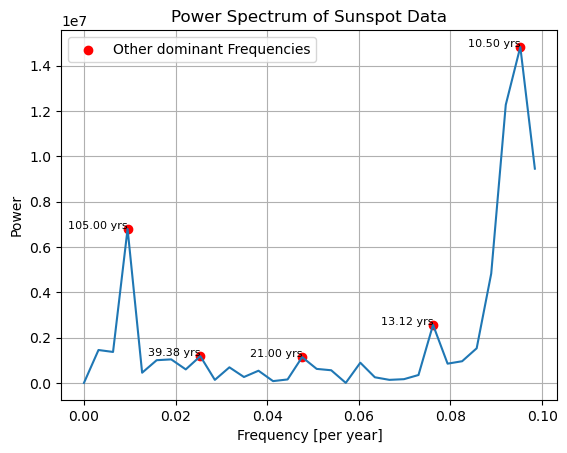

In [6]:
# Answer - 2b

N = len(freq)
power_positive = power[N//2:]
freq_positive = freq[N//2:]
power_positive[0] = 0 

top_frequencies, top_power,top_indices = find_top_frequencies(freq_positive, power_positive, n_peaks=5, min_sep=0.01)

for idx in reversed(top_indices):
    period = 1 / freq_positive[idx]
    print(f"Other period: {period:.2f} years")

plt.plot(freq_positive, power_positive)
plt.scatter(freq_positive[top_indices], power_positive[top_indices], color='red', label='Other dominant Frequencies')

for idx in top_indices:
    period = 1 / freq_positive[idx]
    plt.text(freq_positive[idx], power_positive[idx], f'{period:.2f} yrs', fontsize=8, ha='right')

plt.title('Power Spectrum of Sunspot Data')
plt.xlabel('Frequency [per year]')
plt.ylabel('Power') 
plt.legend()
plt.grid(True)
plt.show()


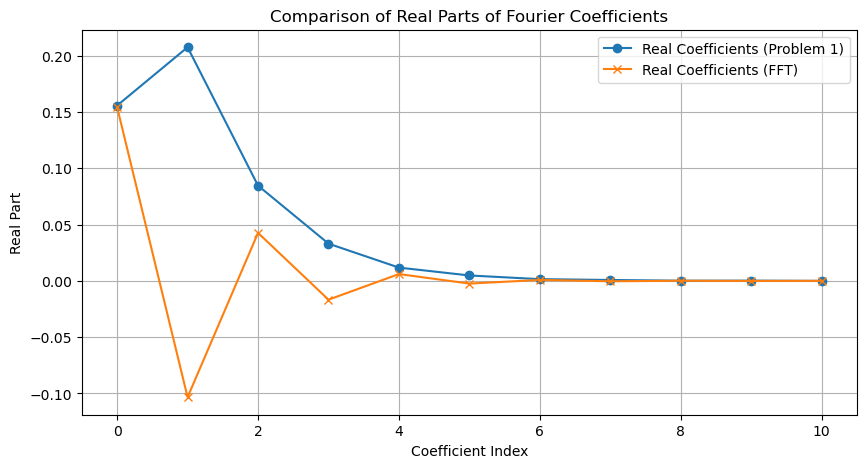

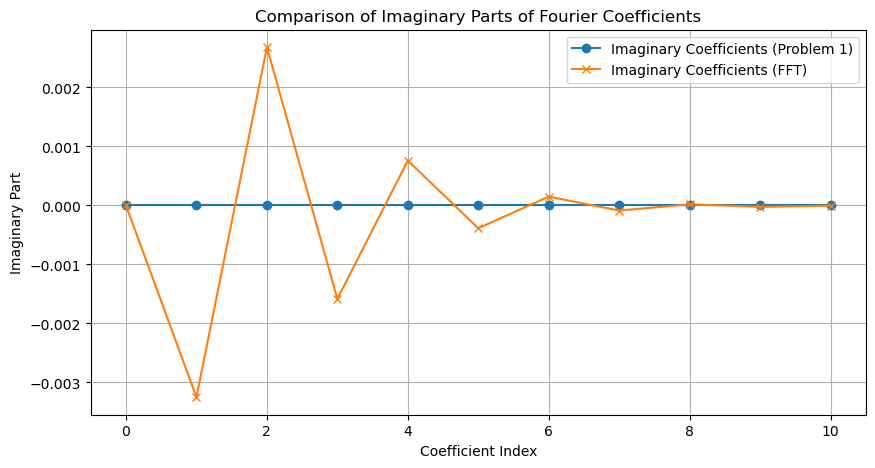

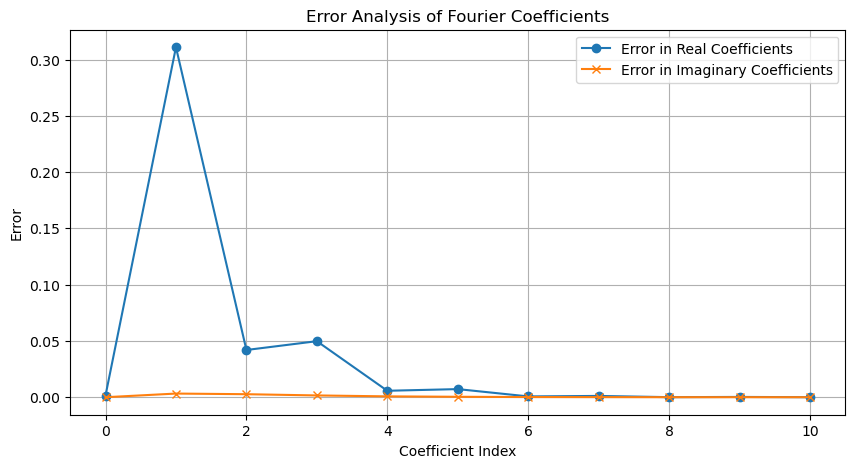

In [7]:
# Answer - 2c
# Compare Fourier coefficients from Problem 1 and FFT
N = 100
x_start = -5
x_end = 5
x = np.linspace(x_start, x_end, N)
L = (x_end - x_start) / 2

# Compute Fourier coefficients using Problem 1's implementation
a0 = ashwin_FC.a_0(func, x, 0, L)
coefficients_problem1 = [a0]
for n in range(1, 11):  # Compute first 10 coefficients
    an = ashwin_FC.a_n(func, x, n, L)
    bn = ashwin_FC.b_n(func, x, n, L)
    coefficients_problem1.append((an, bn))

# Compute Fourier coefficients using FFT
y = func(x)
fft_coefficients = fft(y) / N  # Normalize FFT coefficients
fft_coefficients = fft_coefficients[:11]  # Take first 11 coefficients

# Compare coefficients and plot the analysis
coefficients_problem1_real = [coeff if isinstance(coeff, float) else coeff[0] for coeff in coefficients_problem1]
coefficients_problem1_imag = [0 if isinstance(coeff, float) else coeff[1] for coeff in coefficients_problem1]

fft_coefficients_real = [coeff.real for coeff in fft_coefficients]
fft_coefficients_imag = [coeff.imag for coeff in fft_coefficients]

# Plot real parts comparison
plt.figure(figsize=(10, 5))
plt.plot(range(len(coefficients_problem1_real)), coefficients_problem1_real, 'o-', label="Real Coefficients (Problem 1)")
plt.plot(range(len(fft_coefficients_real)), fft_coefficients_real, 'x-', label="Real Coefficients (FFT)")
plt.title("Comparison of Real Parts of Fourier Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Real Part")
plt.legend()
plt.grid()
plt.show()

# Plot imaginary parts comparison
plt.figure(figsize=(10, 5))
plt.plot(range(len(coefficients_problem1_imag)), coefficients_problem1_imag, 'o-', label="Imaginary Coefficients (Problem 1)")
plt.plot(range(len(fft_coefficients_imag)), fft_coefficients_imag, 'x-', label="Imaginary Coefficients (FFT)")
plt.title("Comparison of Imaginary Parts of Fourier Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid()
plt.show()

# Plot error analysis
error_real = [abs(coefficients_problem1_real[i] - fft_coefficients_real[i]) for i in range(len(coefficients_problem1_real))]
error_imag = [abs(coefficients_problem1_imag[i] - fft_coefficients_imag[i]) for i in range(len(coefficients_problem1_imag))]

plt.figure(figsize=(10, 5))
plt.plot(range(len(error_real)), error_real, 'o-', label="Error in Real Coefficients")
plt.plot(range(len(error_imag)), error_imag, 'x-', label="Error in Imaginary Coefficients")
plt.title("Error Analysis of Fourier Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()


Answer : 

The coefficients are not exacly the same

Dimmerence might be dec of the numerical aproximation. The FFT used a discreat data to measure the fft which we used integration for a continous function,

## Problem 3: FREQUENCY-BASED FILTERING OF MUSIC - 10 points

Here, you will analyse music data and routines of problem 1 (librosa library reminder),

(a) For the sound signal, plot the amplitude spectrum and identify the top 5 frequencies in the beats. (4 points)

(b) Separate the sound signal in a part above and below 2 kHz in frequencies. Plot the amplitude spectra. (4 points)

(c) Compute the error of the reconstruction for both filtered sound signals. Refer to the definition of error from problem 1. Which one gives the better approximation? Can you qualitatively hear it? (2 points)


### Solution to the Problem (3)

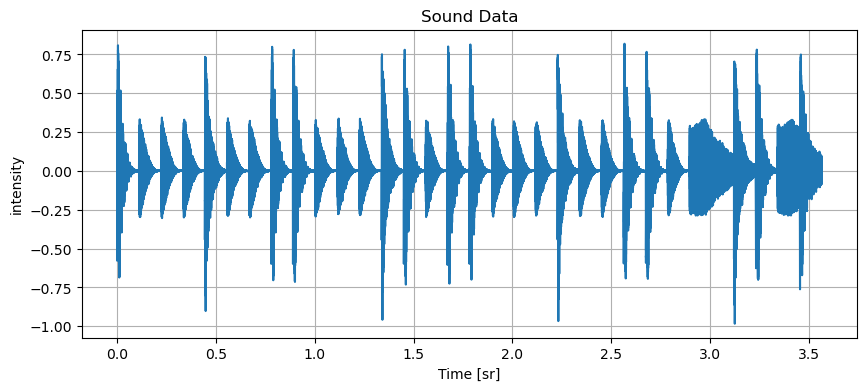

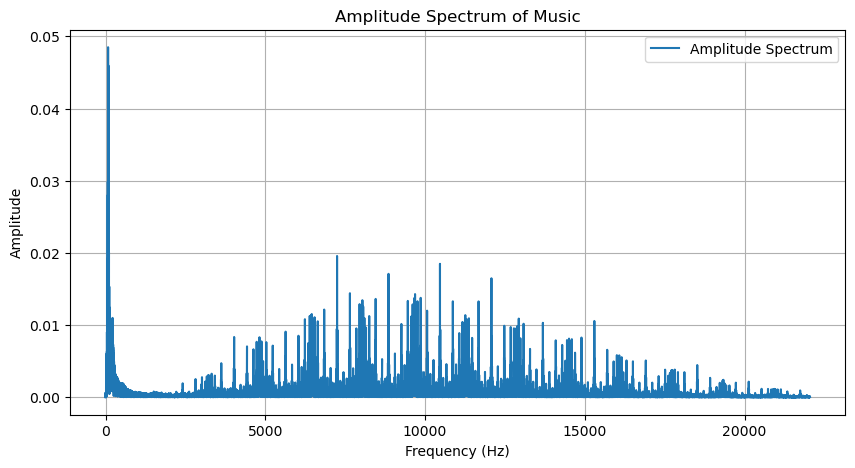

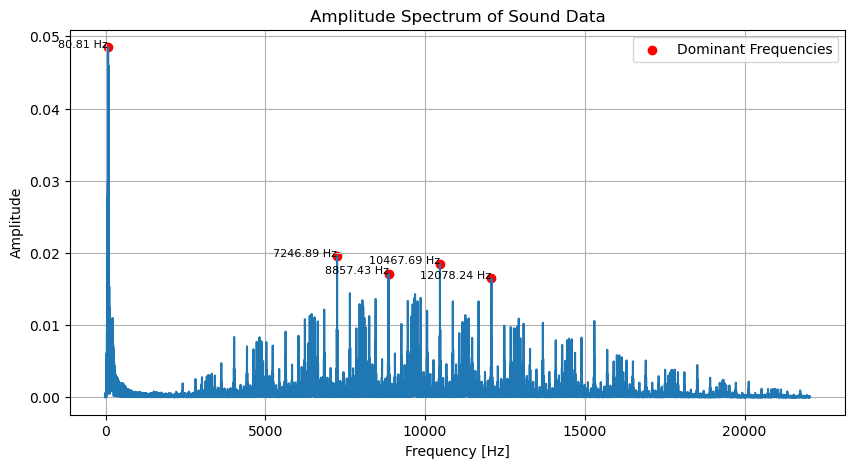

Top frequencies:
Frequency: 80.81 Hz
Frequency: 7246.89 Hz
Frequency: 10467.69 Hz
Frequency: 8857.43 Hz
Frequency: 12078.24 Hz


In [8]:
# Answer 3-a

# Load sunspot data 
y, sr = librosa.load("./assignment-2/Casio-MT-45-16-Beat.wav", sr=None)
time = np.arange(len(y)) / sr

plt.figure(figsize=(10, 4))
plt.plot(time, y)
plt.title('Sound Data')
plt.xlabel('Time [sr]')  
plt.ylabel('intensity')
plt.grid(True)
plt.show()
 
freq , Amplitude = FT_numpy(time,y)
N = len(freq)
freq_positive = freq[N//2:]
Amplitude_positive = abs(Amplitude[N//2:])

# Plot spectrum
plt.figure(figsize=(10, 5))
plt.plot(freq_positive, np.abs(Amplitude_positive), label="Amplitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Amplitude Spectrum of Music")
plt.legend()
plt.grid(True)
plt.show()

# finding top freq
Amplitude_positive[0] = 0 # removing the 0 freq

top_frequencies, top_power,top_indices = find_top_frequencies(freq_positive, np.abs(Amplitude_positive), n_peaks=5, min_sep=100)

plt.figure(figsize=(10, 5))
plt.plot(freq_positive, Amplitude_positive)
plt.scatter(freq_positive[top_indices], Amplitude_positive[top_indices], color='red', label='Dominant Frequencies')

for idx in top_indices:
    period = 1 / freq_positive[idx]
    plt.text(freq_positive[idx], Amplitude_positive[idx], f'{freq_positive[idx]:.2f} Hz', fontsize=8, ha='right')

plt.title('Amplitude Spectrum of Sound Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude') 
plt.legend()
plt.grid(True)
plt.show()

print("Top frequencies:")
for idx in top_indices:
    print(f"Frequency: {freq_positive[idx]:.2f} Hz")


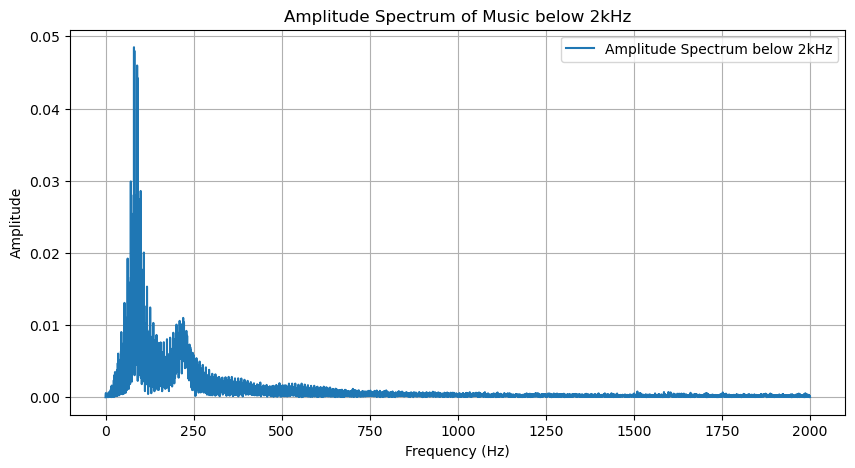

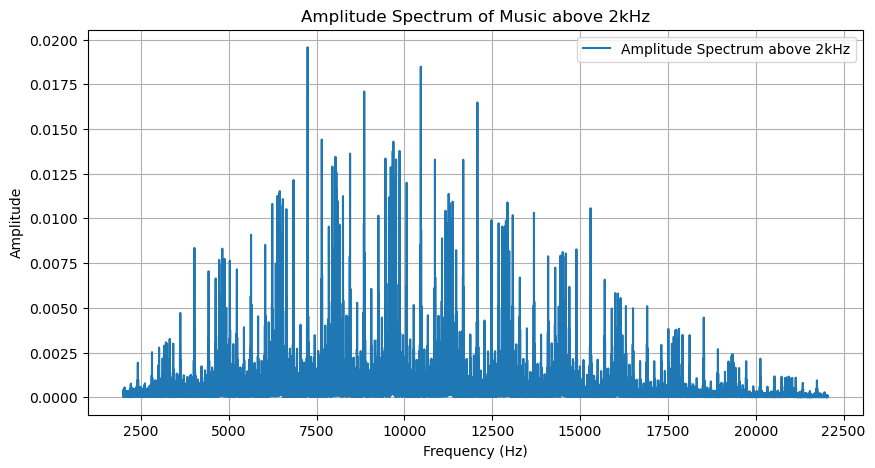

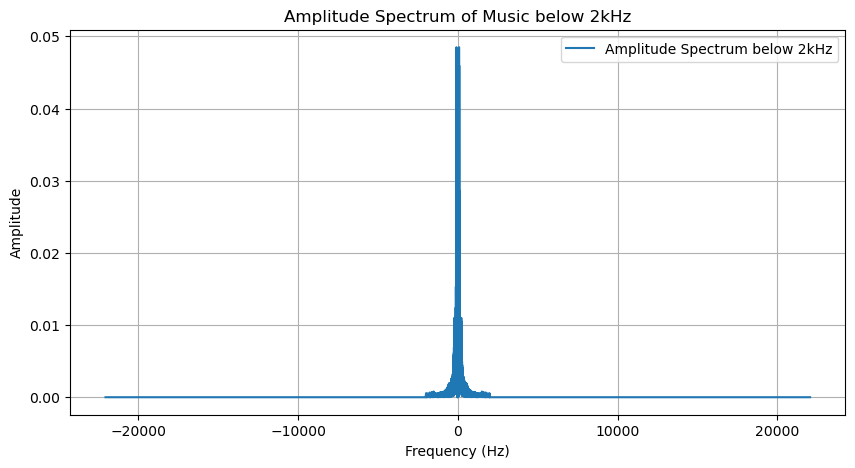

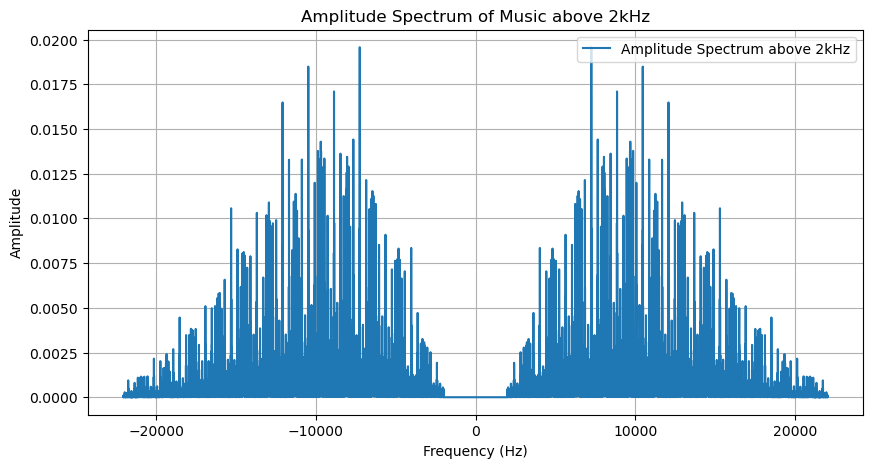

In [9]:
# Answer 3-b

# split in above and below 2khz
freq_positive = freq[N//2:]
Amplitude_positive = Amplitude[N//2:]

idx = np.where(freq_positive <= 2000)[0]
freq_below_2k = freq_positive[idx]
Amplitude_below_2k = Amplitude_positive[idx]

idx = np.where(freq_positive > 2000)[0]
freq_above_2k = freq_positive[idx]
Amplitude_above_2k = Amplitude_positive[idx]

plt.figure(figsize=(10, 5))
plt.plot(freq_below_2k, np.abs(Amplitude_below_2k), label="Amplitude Spectrum below 2kHz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")     
plt.title("Amplitude Spectrum of Music below 2kHz")
plt.legend()
plt.grid(True)          
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(freq_above_2k, np.abs(Amplitude_above_2k), label="Amplitude Spectrum above 2kHz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")     
plt.title("Amplitude Spectrum of Music above 2kHz")
plt.legend()
plt.grid(True)          
plt.show()


idx = np.where(abs(freq) <= 2000)[0]
Amplitude_above_2k = Amplitude.copy()
Amplitude_above_2k[idx] = 0

idx = np.where(abs(freq) > 2000)[0]
Amplitude_below_2k = Amplitude.copy()
Amplitude_below_2k[idx] = 0

plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(Amplitude_below_2k), label="Amplitude Spectrum below 2kHz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")     
plt.title("Amplitude Spectrum of Music below 2kHz")
plt.legend()
plt.grid(True)          
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(freq, np.abs(Amplitude_above_2k), label="Amplitude Spectrum above 2kHz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")     
plt.title("Amplitude Spectrum of Music above 2kHz")
plt.legend()
plt.grid(True)          
plt.show()




/usr/local/AshwinSof/miniconda3/envs/physics_env/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/AshwinSof/miniconda3/envs/physics_env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


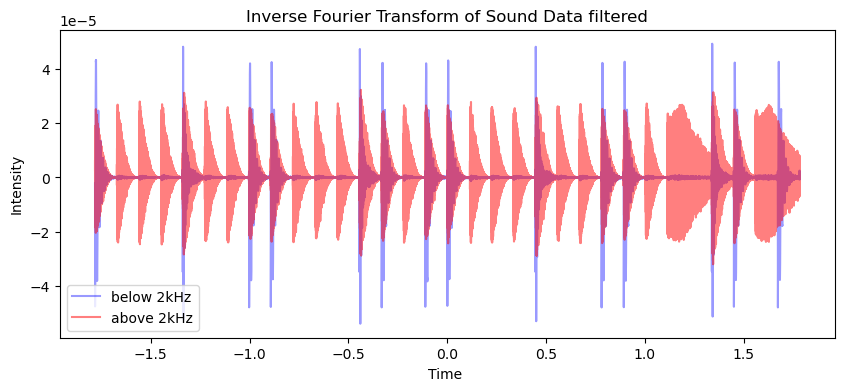

In [10]:
# Answer 3-b
def IFT_numpy(f, FT):
    N = len(f)
    df = f[1] - f[0]             
    x = np.fft.fftfreq(N, df)   
    x = np.fft.fftshift(x)

    FT_unshifted = np.fft.ifftshift(FT)  
    y = np.fft.ifft(FT_unshifted) / df  

    return x, y

# Inverse Fourier Transform
y_below_2k = IFT_numpy(freq, Amplitude_below_2k)
y_above_2k = IFT_numpy(freq, Amplitude_above_2k)
plt.figure(figsize=(10, 4))
plt.plot(y_below_2k[0], y_below_2k[1],"b",label="below 2kHz",alpha=0.4)
plt.plot(y_above_2k[0], y_above_2k[1],"r",label="above 2kHz",alpha=0.5)
plt.title('Inverse Fourier Transform of Sound Data filtered')
plt.xlabel('Time ')
plt.ylabel('Intensity')
plt.legend()
plt.show()




In [11]:
# Answer 3-c
# finding error
def error(original,aprox,):
    N = len(original)
    error = sum((original - aprox)/(original) )/ N
    return abs(error)

# Normilised and Error calculation is done
Error_y_below_2k = error(y_below_2k[1]/max(y_below_2k[1]), Amplitude/max(Amplitude))
Error_y_above_2k = error(y_above_2k[1]/max(y_above_2k[1]), Amplitude/max(Amplitude))
print("Error in Inverse Fourier approximation below 2kHz: ", Error_y_below_2k)
print("Error in Inverse Fourier approximation above 2kHz: ", Error_y_above_2k)

norm_y_below_2k = y_below_2k[1]/max(y_below_2k[1])
norm_y_above_2k = y_above_2k[1]/max(y_above_2k[1])
# Save the filtered sound
sf.write('below_2kHz.wav', norm_y_below_2k.real, sr)
sf.write('above_2kHz.wav', norm_y_above_2k.real, sr)



Error in Inverse Fourier approximation below 2kHz:  28.707450072726115
Error in Inverse Fourier approximation above 2kHz:  13.1004935591466


In [12]:
# Play the original sound
Audio('./assignment-2/Casio-MT-45-16-Beat.wav')

In [13]:
# Play the filtered Low Frequency sound
Audio('below_2kHz.wav')


In [14]:
# Play the filtered High Frequency sound
Audio('above_2kHz.wav')

## Problem 4: 2-D APPLICATION OF FOURIER ANALYSIS ON AN IMAGE - 15 points

Analyse the provided image data using 2-d FFT package.

(a) Using the image, decompose 2-D distribution of the absolute value of the Fourier components. Explain the nature of the distribution. (4 point)

(b) Using these thresholds = 1%, 5%, 10%, 50%, filter the Fourier components. <br/>

(c) Do a inverse Fourier Transform and show the image for these thresholds. <br/> Plot the reconstructed image and compare it with original image, point out the differences between them?  (6 points)

(d) Compute the error between reconstructed and original image where error is given as defined in problem 1. How many coefficients are needed to achieve an error of at most 1%? How much data can be compressed when allowing for an error of 1% level? (5 marks)
    

### Solution of the problem 4


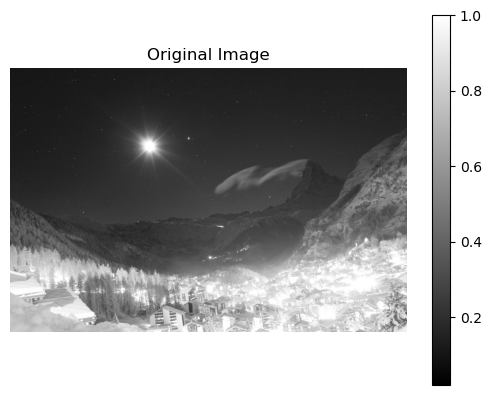

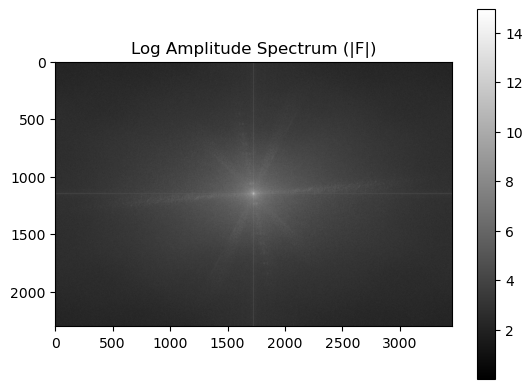

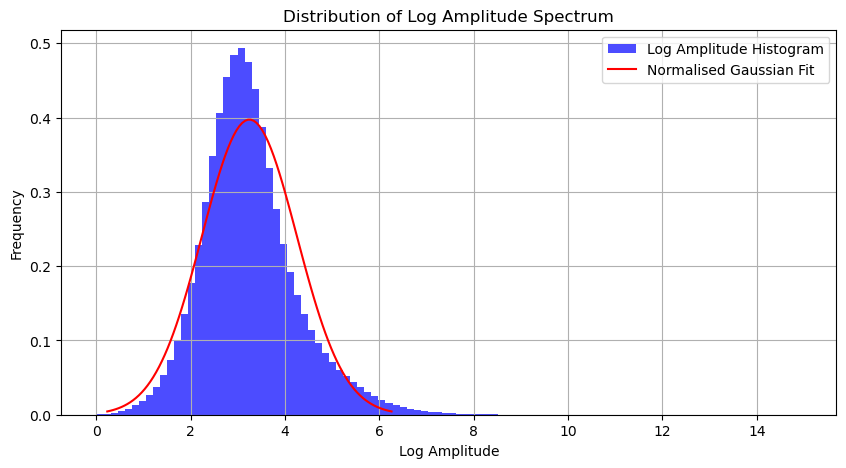

In [15]:
#  Answer 4 a

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Load and convert to grayscale
img =  np.array(Image.open('./assignment-2/img.jpg').convert('L'))
img = np.array(img) / 255.0
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.axis('off') 
plt.show()
# Compute 2D FFT
F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)

# Plot the log-amplitude spectrum
plt.imshow(np.log1p(magnitude), cmap='gray')
plt.title("Log Amplitude Spectrum (|F|)")
plt.colorbar()
plt.show()

# ploting distribution and gaussian along
plt.figure(figsize=(10, 5))
# Normalised histogram
plt.hist(np.log1p(magnitude).ravel(), bins=100, color='blue', alpha=0.7, density=True, label='Log Amplitude Histogram')

# normalised gaussian
mean = np.mean(np.log1p(magnitude))
std = np.std(np.log1p(magnitude))
x = np.linspace(mean - 3*std, mean + 3*std, 100)
gaussian = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
plt.plot(x, gaussian, color='red', label='Normalised Gaussian Fit')
plt.legend()

plt.title("Distribution of Log Amplitude Spectrum")
plt.xlabel("Log Amplitude")
plt.ylabel("Frequency")
plt.grid()
plt.show()




So we get a gaussian distribution. We can also do a student T test to verity.

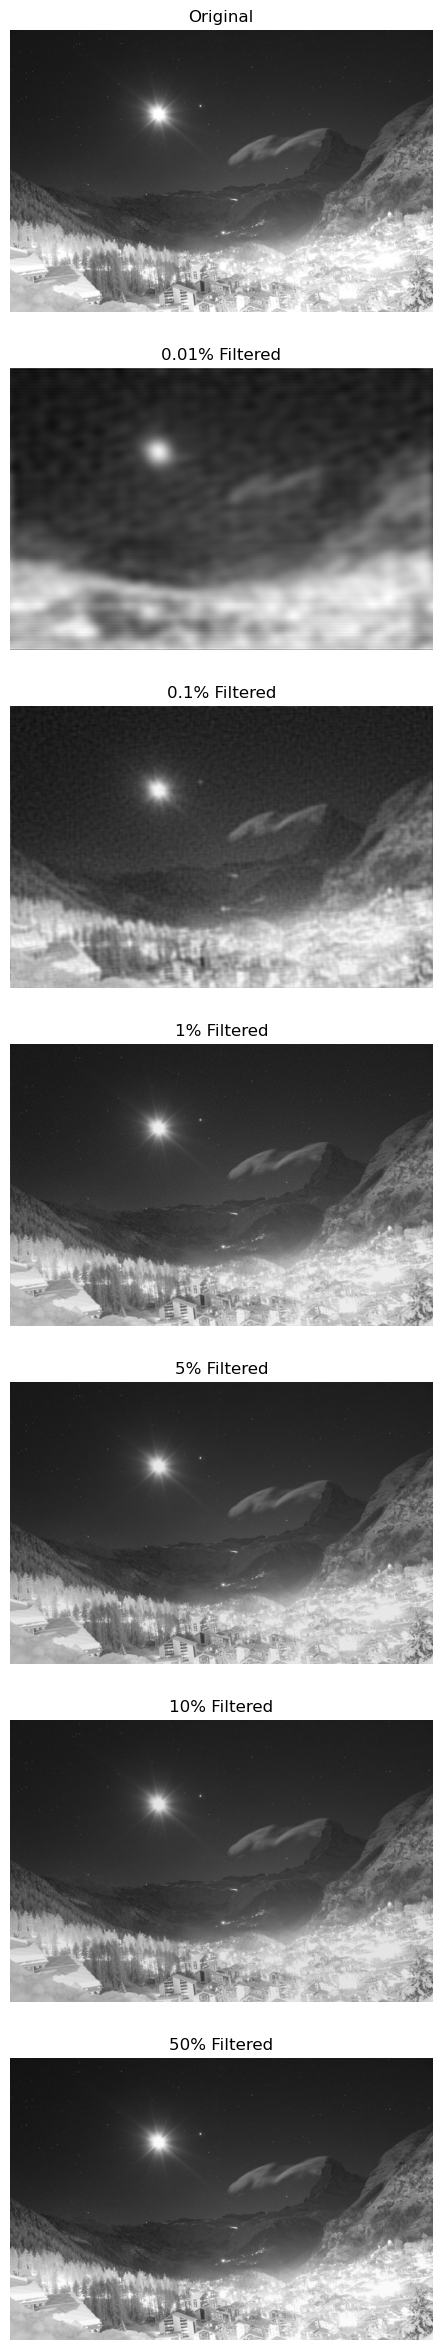

In [16]:
# answer 4 b c
# Just also doing for 0.01 AND 0.1  TO see the difference by eye 


def threshold_filter(F, percentage):
    magnitude = np.abs(F)
    flat = magnitude.flatten()
    threshold = np.percentile(flat, 100 - percentage)
    mask = magnitude >= threshold
    return F * mask

def reconstruct_image(F_filtered):
    F_ishifted = np.fft.ifftshift(F_filtered)
    img_rec = np.fft.ifft2(F_ishifted)
    return np.abs(img_rec)

thresholds = [0.01,0.1,1, 5, 10, 50]

fig, axes = plt.subplots(len(thresholds)+1,1, figsize=(8,30))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("off")

for i, perc in enumerate(thresholds):
    F_filt = threshold_filter(F_shifted, perc)
    img_rec = reconstruct_image(F_filt)
    axes[i+1].imshow(img_rec, cmap='gray')
    axes[i+1].set_title(f"{perc}% Filtered")
    axes[i+1].axis("off")
plt.show()




Error of ≤ 1% at 52% threshold
Compression ratio is 48.00% of data discarded


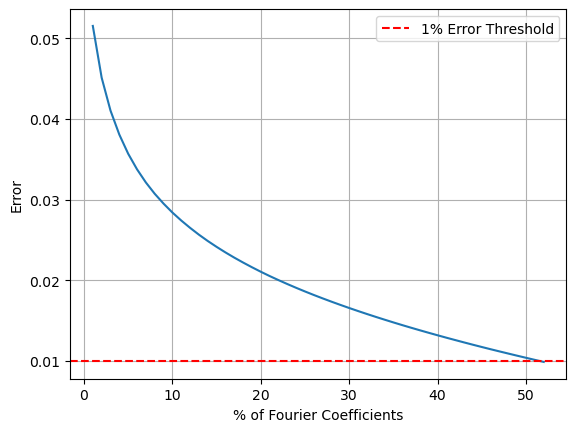

In [17]:
#  Answer 4 d

def compute_error(original, reconstructed):
    error = np.mean(np.abs(original - reconstructed) / (np.abs(original)))
    return error

errors = []
kept_coef = []

for percentage in range(1, 101):
    F_filt = threshold_filter(F_shifted, percentage)
    img_rec = reconstruct_image(F_filt)
    err = compute_error(img, img_rec)
    errors.append(err)
    
    nonzero_coeffs = np.count_nonzero(np.abs(F_filt))
    total_coeffs = F_filt.size
    kept_coef.append(nonzero_coeffs / total_coeffs)

    if err <= 0.01:
        print(f"Error of ≤ 1% at {percentage}% threshold")
        print(f"Compression ratio is {100*(1 - kept_coef[-1]):.2f}% of data discarded")
        break

# Optional: plot error curve
plt.plot(range(1, len(errors)+1), errors)
plt.axhline(0.01, color='red', linestyle='--', label='1% Error Threshold')
plt.xlabel("% of Fourier Coefficients")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()



# The End